# 🫀 Heart Disease Prediction


## 1. 📥 Load Data

In [ ]:
import pandas as pd

# Load CSV after uploading via the folder icon or file picker
df = pd.read_csv('/content/heart.csv')  # Adjust path if needed

# Preview
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## 2. 🔍 EDA

In [ ]:
# Overview of data structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# Statistical summary
df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df['HeartDisease'].value_counts()


,count
HeartDisease,
1,508
0,410


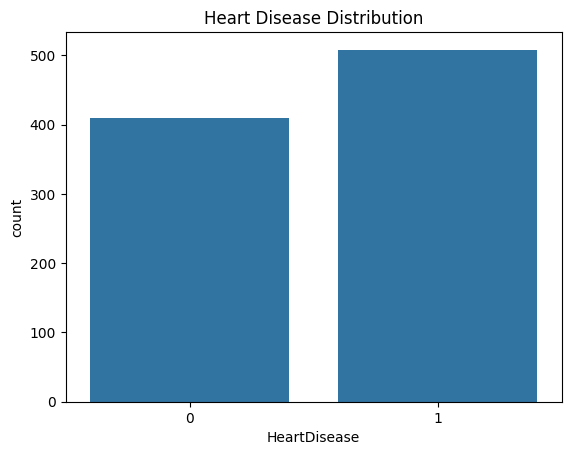

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='HeartDisease', data=df)
plt.title('Heart Disease Distribution')
plt.show()


## 🧹 3. Preprocessing


In [ ]:
# Replace 0s in cholesterol with NaN
df['Cholesterol'] = df['Cholesterol'].replace(0, pd.NA)

# Check how many NaNs now
df['Cholesterol'].isna().sum()


np.int64(172)

In [ ]:
# Impute missing cholesterol with median
median_chol = df['Cholesterol'].median()
df['Cholesterol'] = df['Cholesterol'].fillna(median_chol)

# Check again
df['Cholesterol'].isna().sum()


/tmp/ipython-input-10-3262826362.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Cholesterol'] = df['Cholesterol'].fillna(median_chol)


np.int64(0)

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,243.204793,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,53.401297,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df['RestingBP'] = df['RestingBP'].replace(0, pd.NA)
df['RestingBP'].isna().sum()


np.int64(1)

In [ ]:
# Impute missing RestingBP with median
median_bp = df['RestingBP'].median()
df['RestingBP'] = df['RestingBP'].fillna(median_bp)

# Confirm it's fixed
df['RestingBP'].isna().sum()


/tmp/ipython-input-13-2855749779.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RestingBP'] = df['RestingBP'].fillna(median_bp)


np.int64(0)

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.538126,243.204793,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.990127,53.401297,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.select_dtypes(include='object').columns


Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

## 🔄 4. Encode Categorical Variables


In [ ]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Check shape and column names
df_encoded.shape, df_encoded.columns


((918, 16),
 Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
        'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
        'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
        'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
       dtype='object'))

In [ ]:
# Target variable
y = df_encoded['HeartDisease']

# Feature set = everything except the target
X = df_encoded.drop('HeartDisease', axis=1)


## 📏 5. Train-Test Split & Feature Scaling


In [ ]:
from sklearn.model_selection import train_test_split

# 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 🤖 6. Model Training & Evaluation


### 🔹 Linear Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predict
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]  # for AUC

# Evaluate
print("📊 Logistic Regression Performance:\n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_prob), 3))


📊 Logistic Regression Performance:

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

Confusion Matrix:
 [[71 11]
 [ 9 93]]
ROC AUC Score: 0.933


         Predicted
         0     1
Actual  ---------
  0    | 71 | 11   → 11 false positives (healthy flagged as sick)
  1    |  9 | 93   → 9 false negatives (missed heart disease)


### 🔹 Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_scaled, y_train)

# Predict
y_pred_tree = tree.predict(X_test_scaled)
y_prob_tree = tree.predict_proba(X_test_scaled)[:, 1]

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("📊 Decision Tree Performance:\n")
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_prob_tree), 3))


📊 Decision Tree Performance:

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        82
           1       0.79      0.81      0.80       102

    accuracy                           0.78       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.78      0.78      0.78       184

Confusion Matrix:
 [[60 22]
 [19 83]]
ROC AUC Score: 0.773


### 🔹 Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print("📊 Random Forest Performance:\n")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_prob_rf), 3))


📊 Random Forest Performance:

              precision    recall  f1-score   support

           0       0.86      0.87      0.86        82
           1       0.89      0.88      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

Confusion Matrix:
 [[71 11]
 [12 90]]
ROC AUC Score: 0.933


## 🔧 7. Hyperparameter Tuning (Random Forest)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create the model
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearch
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train_scaled, y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [ ]:
# Best model
best_rf = grid_search.best_estimator_

# Predict and evaluate
y_pred_best = best_rf.predict(X_test_scaled)
y_prob_best = best_rf.predict_proba(X_test_scaled)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("✅ Tuned Random Forest Performance:\n")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_prob_best), 3))
print("\nBest Hyperparameters:")
print(grid_search.best_params_)


✅ Tuned Random Forest Performance:

              precision    recall  f1-score   support

           0       0.84      0.85      0.85        82
           1       0.88      0.87      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Confusion Matrix:
 [[70 12]
 [13 89]]
ROC AUC Score: 0.93

Best Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## 📊 8. Feature Importance


/tmp/ipython-input-26-1577663058.py:16: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


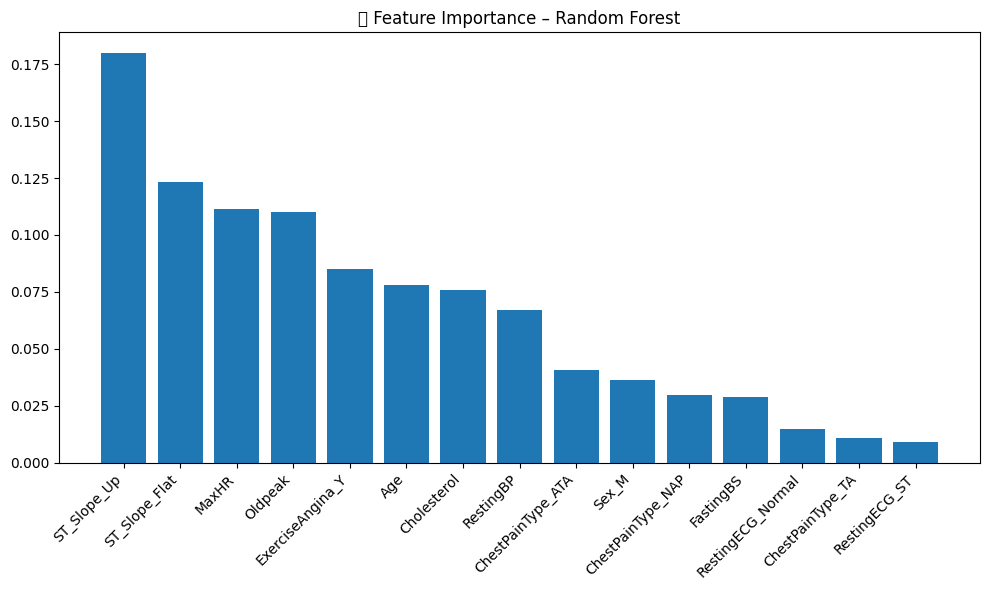

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances
importances = best_rf.feature_importances_
feature_names = X.columns  # original (not scaled) feature names

# Sort by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("🔍 Feature Importance – Random Forest")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 📊 Feature Importance (Random Forest)

The most influential factors for predicting heart disease were:

1. **ST Slope (Up/Flat)** — ST segment slope during exercise is a key indicator of heart function. A flat slope may suggest ischemia, while an upward slope often indicates healthy response.
2. **MaxHR (Maximum Heart Rate)** — A patient’s peak heart rate during a stress test. Lower values may signal a less responsive or weaker cardiovascular system.

These features align closely with clinical practices for diagnosing heart conditions and confirm the model’s real-world relevance.

